In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
# Import the data
df_train = pd.read_excel('Resources/titanic_full.xls')
df_train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
# Removing unwanted columns
df_train.drop(["name","ticket","cabin","home.dest","body","boat","embarked"], axis=1, inplace=True)
df_train.head()

,pclass,survived,sex,age,sibsp,parch
0,1,1,female,29.0000,0,0
1,1,1,male,0.9167,1,2
2,1,0,female,2.0000,1,2
3,1,0,male,30.0000,1,2
4,1,0,female,25.0000,1,2


In [4]:
# Adjusting Pclass column to strings
df_train['pclass'] = df_train['pclass'].replace([1,2,3],['1st','2nd','3rd'])
df_train['family'] = df_train['sibsp']+df_train['parch']
df_train.drop(['sibsp','parch'], axis=1, inplace=True)
df_train.head()

,pclass,survived,sex,age,family
0,1st,1,female,29.0000,0
1,1st,1,male,0.9167,3
2,1st,0,female,2.0000,3
3,1st,0,male,30.0000,3
4,1st,0,female,25.0000,3


In [5]:
# Dropping NAN Values
df_train = df_train.dropna(how='any')

In [6]:
# Converting categorical data to dummy values for testing
df_train = pd.get_dummies(df_train)

In [7]:
# Split the data into X_train, X_test, y_train, y_test
y = df_train["survived"].values
X = df_train.drop("survived", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

X_train.head()

,age,family,pclass_1st,pclass_2nd,pclass_3rd,sex_female,sex_male
952,22.0,0,0,0,1,0,1
1271,28.0,0,0,0,1,0,1
182,30.0,0,1,0,0,1,0
1047,15.0,0,0,0,1,1,0
734,3.0,2,0,0,1,0,1


In [8]:
# Scaling Data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [9]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression(solver='lbfgs',max_iter=1000)
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7678571428571429
Testing Data Score: 0.8320610687022901


# KNN

k: 1, Train/Test Score: 0.883/0.744
k: 3, Train/Test Score: 0.849/0.828
k: 5, Train/Test Score: 0.832/0.836
k: 7, Train/Test Score: 0.819/0.828
k: 9, Train/Test Score: 0.816/0.840
k: 11, Train/Test Score: 0.811/0.851
k: 13, Train/Test Score: 0.802/0.851
k: 15, Train/Test Score: 0.804/0.844
k: 17, Train/Test Score: 0.804/0.851
k: 19, Train/Test Score: 0.795/0.844


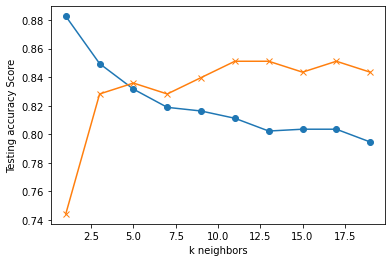

In [10]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
# Note that k: 5 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=11 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=11 Test Acc: 0.851


## DNN

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=40, activation="relu", input_dim=8))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 1,581
Trainable params: 1,581
Non-trainable params: 0
_________________________________________________________________


2022-08-13 11:23:21.950289: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


2022-08-13 11:23:22.064177: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


25/25 [==============================] - 0s 1ms/step - loss: 0.6354 - accuracy: 0.7124
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5488 - accuracy: 0.7676
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5362 - accuracy: 0.7552
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4951 - accuracy: 0.7723
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7773
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.7711
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4785 - accuracy: 0.7561
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4386 - accuracy: 0.7887
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4543 - accuracy: 0.7960
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7906
Epoch 11/100
25/25 [=

25/25 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.7956
Epoch 84/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8157
Epoch 85/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.7890
Epoch 86/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4140 - accuracy: 0.8201
Epoch 87/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4430 - accuracy: 0.7976
Epoch 88/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8098
Epoch 89/100
25/25 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8336
Epoch 90/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3979 - accuracy: 0.8309
Epoch 91/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8126
Epoch 92/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.7842
Epoch 93/100


In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

9/9 - 0s - loss: 0.3691 - accuracy: 0.8435
Loss: 0.3691118061542511, Accuracy: 0.8435114622116089


## Decision Tree

In [20]:
# Create data
X, y = make_classification(random_state=1, n_features=8, n_informative=5, n_redundant=0)
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.76


[0.28684079 0.06256082 0.19845548 0.17838987 0.08382951 0.11245222
 0.07747131]


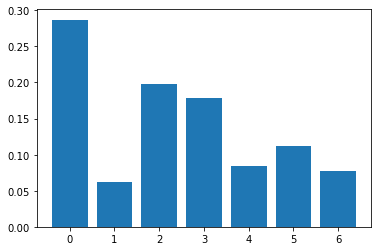

In [22]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

## Creating Model

In [23]:
import pickle
pickle.dump(clf, open('model_randomforrest_2022080848.pkl','wb'))